<a href="https://colab.research.google.com/github/faustofcjr/artificial-intelligence/blob/develop/udemy/tensorflow-2.0/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix

import tensorflow as tf

### load de data

In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


### Build the model

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

### Compile the model

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train the model

In [5]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3022 - accuracy: 0.9131 - val_loss: 0.1483 - val_accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1460 - accuracy: 0.9571 - val_loss: 0.0997 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1110 - accuracy: 0.9663 - val_loss: 0.0849 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9714 - val_loss: 0.0763 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9785 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9806 - val_loss: 0.0725 - val_accuracy

### Plot the loss per iteration

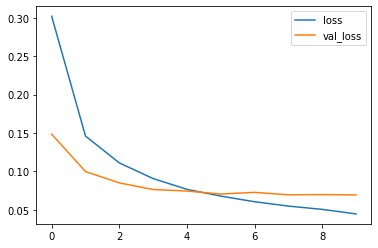

In [6]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

### Plot accuracy per iteration

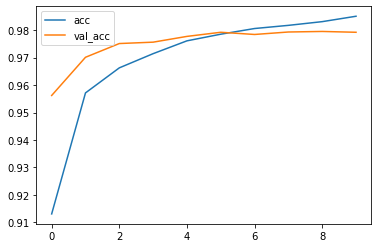

In [7]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

### Evaluate the model

In [8]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9792
[0.06919392943382263, 0.979200005531311]


### Plot confusion matrix

Confusion matrix, without normalization
[[ 970    0    1    0    0    0    2    3    1    3]
 [   0 1128    2    0    0    0    2    0    3    0]
 [   3    2 1009    2    1    0    3    4    8    0]
 [   0    0    5  988    0    6    0    5    5    1]
 [   1    0    1    0  965    0    5    1    0    9]
 [   3    0    0    9    1  865    6    2    3    3]
 [   4    1    0    1    4    1  947    0    0    0]
 [   2    4   12    2    2    0    0 1000    1    5]
 [   7    0    2    2    6    6    4    2  939    6]
 [   0    5    0    2   10    3    0    5    3  981]]


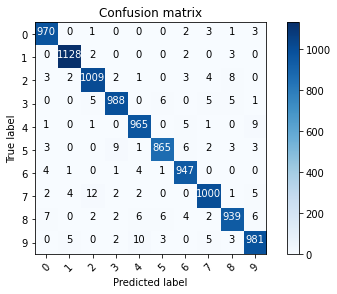

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`
  """
  if normalize:
    cm = cm.astype("foat") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# do these result make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.



### Show some misclassified examples

Text(0.5, 1.0, 'True label: 3 Predicted: 5')

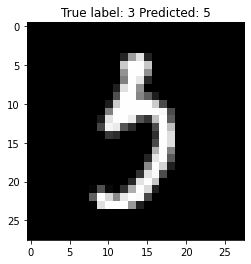

In [13]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))